### 1. Extract Text from PDF

In [4]:
import PyPDF2

def extract_text_from_pdf(file_path):
    text = ''
    
    with open(file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        for page_num in range(len(reader.pages)):
            page = reader.pages[page_num]
            text += page.extract_text()
    
    return text


### 2. Extract Images from PDF

In [5]:
import pdfplumber
from PIL import Image
from io import BytesIO

def extract_images_from_pdf(file_path):
    images = []
    
    with pdfplumber.open(file_path) as pdf:
        for page in pdf.pages:
            if 'images' in page.objects:
                for img in page.objects['images']:
                    x0, top, x1, bottom = img['x0'], img['top'], img['x1'], img['bottom']
                    cropped_image = page.within_bbox((x0, top, x1, bottom))
                    pil_image = Image.open(BytesIO(cropped_image.to_image().original))
                    images.append(pil_image)
    
    return images

### 3. OCR (Optical Character Recognition) on Images

In [6]:
import pytesseract

def ocr_image(image):
    return pytesseract.image_to_string(image)

### 4. Extract Tables from PDF

In [7]:
import pdfplumber

def extract_tables_from_pdf(file_path):
    tables = []
    
    with pdfplumber.open(file_path) as pdf:
        for page in pdf.pages:
            extracted_tables = page.extract_tables()
            if extracted_tables:
                for table in extracted_tables:
                    if table:
                        tables.append(table)
    
    return tables

### 5. Preprocess Text

In [8]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    processed_text = ' '.join(tokens)
    return processed_text

### 6. Combine All Steps

In [10]:
def extract_text_with_handling(file_path):
    text = extract_text_from_pdf(file_path)
    images = extract_images_from_pdf(file_path)
    tables = extract_tables_from_pdf(file_path)
    
    text += '\n\n--- Extracted Graphs and Equations ---\n\n'
    for i, image in enumerate(images):
        text += f'Graph/Equation {i+1}:\n'
        text += ocr_image(image)
        text += '\n\n'
    
    text += '\n\n--- Extracted Tables ---\n\n'
    for i, table in enumerate(tables):
        text += f'Table {i+1}:\n'
        for row in table:
            if row:
                text += ', '.join(str(cell) for cell in row if cell is not None) + '\n'
        text += '\n'
    
    processed_text = preprocess_text(text)
    
    return processed_text

# Example usage
file_path = 'PUI.pdf' # Or other pdf file of interest
final_text = extract_text_with_handling(file_path)
final_text


'new perspectives policy uncertainty sandile hlatshwayo ad e r ns u b e di np r ls f c ft h e requirements degree doctor philosophy economics graduate division university california berkeley committee charge professor andrés rodríguezclare cochair professor maurice obstfeld cochair professor benjamin faber professor thibault fally spring new perspectives policy uncertainty copyright sandile hlatshwayo abstract new perspectives policy uncertainty sandile hlatshwayo doctor philosophy economics university california berkeley professor andrés rodríguezclare cochair professor maurice obstfeld cochair recent years ubiquitous intensifying nature economic policy uncertainty made popular explanation weak economic performance developed developing markets alike primary channel eﬀect decreased delayed investment ﬁrms adopt “ wait see ” approach irreversible investments bernanke dixit pindyck deep empirical examination policy uncertainty ’ impact rare diﬃculty associated measuring magnitude changes

### Detailed Text Analysis Tasks

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform([final_text])
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray()

# Display top 10 terms with highest TF-IDF scores
top_n = 10
tfidf_scores_and_terms = list(zip(tfidf_scores[0], feature_names))
top_terms = sorted(tfidf_scores_and_terms, key=lambda x: x[0], reverse=True)[:top_n]
print(f'Top {top_n} terms by TF-IDF: {top_terms}')

Top 10 terms by TF-IDF: [(0.5100017688347881, 'uncertainty'), (0.44051740085861985, 'policy'), (0.30222327042061514, 'yes'), (0.17742125026924505, 'icc'), (0.16662756203993737, 'ﬁrms'), (0.15988150689662006, 'trade'), (0.1180559650080528, 'results'), (0.10523846023574991, 'economic'), (0.09646858854943742, 'table'), (0.09511937752077396, 'ﬁrm')]


### Results: <span style="font-weight:normal; font-size:18px;">The results represent the top 10 terms on thesis document by their TF-IDF scores. Here's a breakdown what these results mean: </span>
- 1. **TF-IDF:** Earch term is associated with a TF-IDF score. This score measures the importance of the term in the document relative to the corpus (in this case, the single document). A higher score indicates a higher importance.
 
- 2. **Terms:** These are the words that have the highest TF-IDF scores in the document. They are considered the most significant in the contex of the text. 


### Interpreting the Results
- **uncertainty (0.5100017688347881):** This term has the highest TF-IDF score, indicating it is the most important word in the document. It suggests that the concept of the uncernity is a key focus of the text. 
- **policy (0.44051740085861985):** The second most significant term, suggesting that the document policies extensively. 
- **yes (0.30222327042061514):** This term has a relatively high score, which might indicate a frequent affirmative response or agreeement within the text. it might also appear intables or results section.
- **icc (0.17742125026924505):** Likely an acronym or specific term frequently mentioned in the document. Understanding the context where it appears would provide more insight.
- **firms (0.16662756203993737):** Indicates the document discusses firms or companies, making it an important topic.
- **trade (0.15988150689662006):** Suggests that trade is another key focus of the document.
- **results (0.1180559650080528):** Indicates that the document likely contains discussions or presentations of results, possibly from studies or anylses.
- **economic (0.10523846023574991):** Suggests that economic aspects or economies are discussed prominetly in the document.
- **table (0.09646858854943742):** The presence of this term indicates that tables are a significant part of the document, likely presenting data or results.
- **firm (0.09511937752077396)**: Similar to "firms," this term discussions about individual firm or firms.

### Summary 
these terms provide a quick overview of the main topics in your document. For example, your document likely discussed issues related to uncertainty, policy, firm, trade, economies reslts, and possibly includes tables with data.

### Further Analysis and Visualization

In [16]:
# Install required packages
# get_ipython().system('pip install wordcloud')
# get_ipython().system('pip install vaderSentiment')

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


Top terms by frequency:
0.5100017688347881: uncertainty
0.44051740085861985: policy
0.30222327042061514: yes
0.17742125026924505: icc
0.16662756203993737: ﬁrms
0.15988150689662006: trade
0.1180559650080528: results
0.10523846023574991: economic
0.09646858854943742: table
0.09511937752077396: ﬁrm

Sentiment Scores:
{'neg': 0.125, 'neu': 0.754, 'pos': 0.121, 'compound': -0.9989}


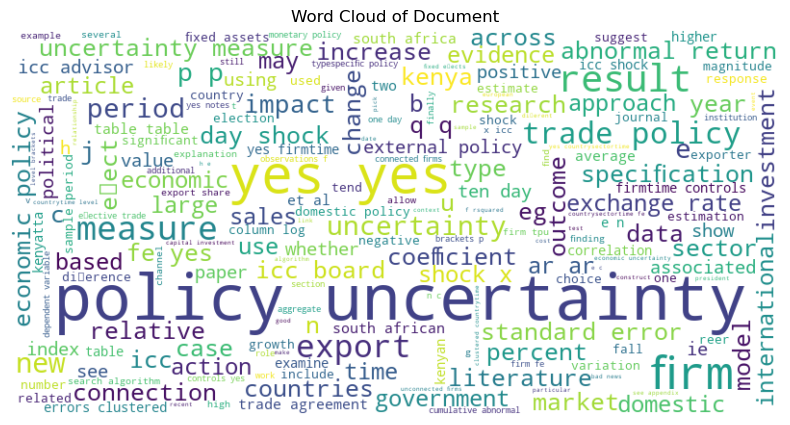

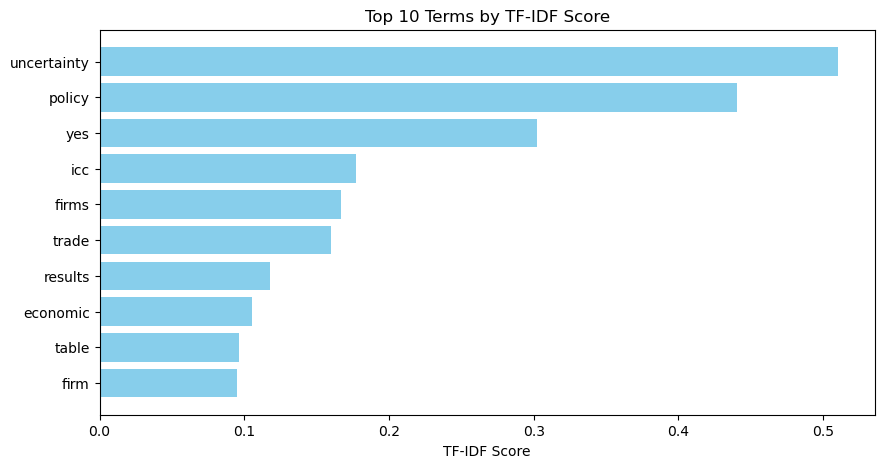

In [17]:
import nltk
nltk.download('vader_lexicon')

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np

# Further Analysis: Term Frequency
term_frequencies = tfidf_vectorizer.transform([final_text]).toarray().flatten()
term_frequency_pairs = list(zip(term_frequencies, feature_names))
top_terms_by_frequency = sorted(term_frequency_pairs, key=lambda x: x[0], reverse=True)[:10]

print("Top terms by frequency:")
for term, freq in top_terms_by_frequency:
    print(f"{term}: {freq}")

# Sentiment Analysis
sid = SentimentIntensityAnalyzer()
sentiment_scores = sid.polarity_scores(final_text)
print("\nSentiment Scores:")
print(sentiment_scores)

# Visualization: Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(final_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Document")
plt.show()

# Visualization: Bar Chart of TF-IDF Scores
terms = [term for score, term in top_terms]
scores = [score for score, term in top_terms]

plt.figure(figsize=(10, 5))
plt.barh(terms, scores, color='skyblue')
plt.xlabel("TF-IDF Score")
plt.title("Top 10 Terms by TF-IDF Score")
plt.gca().invert_yaxis()  # Highest scores at the top
plt.show()

### Word Cloud
 
A word cloud is a visual representation of text data, where the size of each word indicates its frequency or importance within the document. The larger the word in the word cloud, the more frequently it appears in the text. This type of visualization helps to quickly identify the most prominent terms and gives an overall sense of the main topics covered in the document.

**Explanation of the Word Cloud of the Thesis Document PDF:**
1. **Prominent Terms**:
- The largest words in the word cloud are the ones that appear most frequently in the document. Based on the analysis, terms like "uncertainty," "policy," "yes," and "icc" are likely to be prominent.
 
2. **Topic Overview**:
- The word cloud gives a snapshot of the main topics and keywords discussed in the document. For instance, if "uncertainty" and "policy" are large, it suggests that these concepts are central to the content of the PDF.
3. **Visual Appeal**:
- Word clouds are also aesthetically pleasing and can be used in presentations or reports to summarize text data visually.

### Top Terms by TF-IDF Score
**TF-IDF (Term Frequency-Inverse Document Frequency)** is a numerical statistic that reflects the importance of a term in a document relative to a collection of documents (corpus). The higher the TF-IDF score, the more important the term is in the specific document.

**Explanation:**
- **High TF-IDF Score**:
#- Terms like "uncertainty" and "policy" have high TF-IDF scores, indicating that they are not only frequent but also particularly significant to this document compared to others.
- **Unique Insights**:
#- Terms with high TF-IDF scores provide unique insights into the document’s specific content and can help in identifying the main themes and important details.

### Sentiment Analysis 
**Sentiment analysis** assesses the emotional tone conveyed by the text. Using VADER (Valence Aware Dictionary and sEntiment Reasoner), the sentiment analysis returns scores for positive, negative, neutral, and compound sentiments.
**Explanation:**
- **Sentiment Scores**:
- The sentiment scores provide a quick overview of the emotional tone of the document. For example:
- **Positive**: Indicates the proportion of text that is positive.
- **Negative**: Indicates the proportion of text that is negative.
- **Neutral**: Indicates the proportion of text that is neutral.
- **Compound**: A normalized score between -1 (most negative) and +1 (most positive) representing the overall sentiment.

### Bar Chart of Top 10 Terms by TF-IDF Score
A bar chart visually represents the top 10 terms with the highest TF-IDF scores. It helps in understanding which terms are most significant in the document.

**Explanation:**
- **Bar Length**:
#- The length of each bar represents the TF-IDF score of the term. Longer bars indicate higher significance.
- **Term Importance**:
#- This chart highlights the terms that are crucial for understanding the document's content and context.

### Putting It All Together
Combining these analyses provides a comprehensive understanding of the document:
1. **Word Cloud**:
- Offers a quick visual summary of the most frequent terms.
2. **Top Terms by TF-IDF Score**:
- Identifies the most significant terms in the context of your document.
3. **Sentiment Analysis**:
- Provides an emotional overview of the text.
4. **Bar Chart**:
- Visually ranks the importance of terms based on their TF-IDF scores.